# Student Score Prediction using Linear Regression
---

**Internship Task:** Student Score Prediction  
**Tools Used:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn  
**Objective:** Predict students' exam scores based on study hours, and experiment with additional features and polynomial regression.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Load Dataset

In [18]:
student_file_path = 'data/StudentPerformanceFactors.csv'
student_performance = pd.read_csv(student_file_path)

In [19]:
print(student_performance.columns)
student_performance.head()

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Data Cleaning

In [20]:
student_performance = student_performance.dropna(axis=0)
student_performance.isna().any()

Hours_Studied                 False
Attendance                    False
Parental_Involvement          False
Access_to_Resources           False
Extracurricular_Activities    False
Sleep_Hours                   False
Previous_Scores               False
Motivation_Level              False
Internet_Access               False
Tutoring_Sessions             False
Family_Income                 False
Teacher_Quality               False
School_Type                   False
Peer_Influence                False
Physical_Activity             False
Learning_Disabilities         False
Parental_Education_Level      False
Distance_from_Home            False
Gender                        False
Exam_Score                    False
dtype: bool

## Data Visualization

In [21]:
student_hours_and_scores = student_performance[['Hours_Studied', 'Exam_Score']]
print(student_hours_and_scores.describe())

       Hours_Studied   Exam_Score
count    6378.000000  6378.000000
mean       19.977109    67.252117
std         5.985460     3.914217
min         1.000000    55.000000
25%        16.000000    65.000000
50%        20.000000    67.000000
75%        24.000000    69.000000
max        44.000000   101.000000


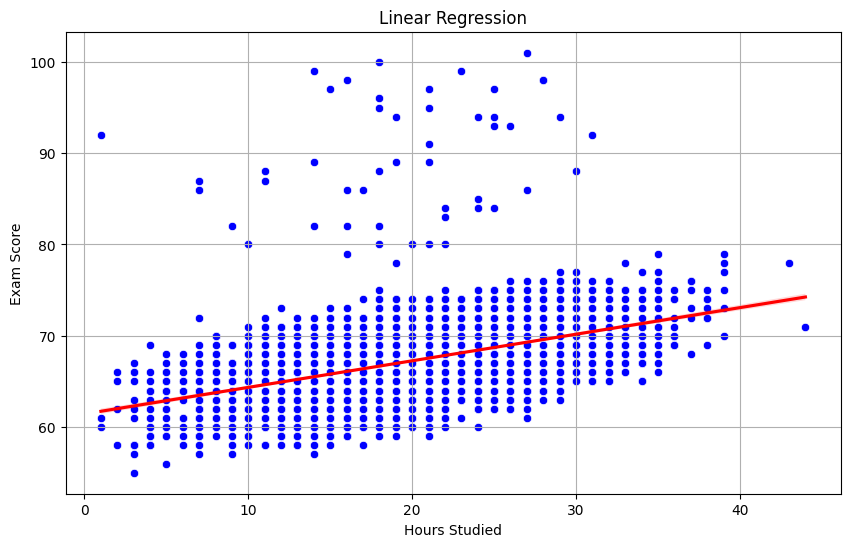

Correlation: 0.45


In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=student_hours_and_scores, color='b')
sns.regplot(x='Hours_Studied', y='Exam_Score', data=student_hours_and_scores, scatter=None, color='r')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression')
plt.grid(True)
plt.show()

corr = student_hours_and_scores['Hours_Studied'].corr(student_hours_and_scores['Exam_Score'])
print(f'Correlation: {corr:.2f}')

## Train-Test Split

In [23]:
X = student_hours_and_scores[['Hours_Studied']]
y = student_hours_and_scores['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression Model

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Train R² score: {model.score(X_train, y_train):.4f}")
print(f"Test R² score: {model.score(X_test, y_test):.4f}")

Train R² score: 0.1963
Test R² score: 0.2051


## Evaluation Metrics

In [25]:
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")

MAE: 2.53
MSE: 12.35
R²: 0.21
Intercept: 61.49
Coefficient: 0.29


## Bonus: Polynomial Regression

In [26]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [27]:
lr = LinearRegression()
lr.fit(X_poly_train, y_train)

print(f"Train R² score (Poly): {lr.score(X_poly_train, y_train):.4f}")
print(f"Test R² score (Poly): {lr.score(X_poly_test, y_test):.4f}")

Train R² score (Poly): 0.1968
Test R² score (Poly): 0.2051


In [28]:
y_poly_pred = lr.predict(X_poly_test)
print(f"MAE (Poly): {mean_absolute_error(y_test, y_poly_pred):.2f}")
print(f"MSE (Poly): {mean_squared_error(y_test, y_poly_pred):.2f}")
print(f"R² (Poly): {r2_score(y_test, y_poly_pred):.2f}")

print(f"Intercept (Poly): {lr.intercept_:.2f}")
print(f"Coefficients (Poly): {lr.coef_}")

MAE (Poly): 2.53
MSE (Poly): 12.35
R² (Poly): 0.21
Intercept (Poly): 62.13
Coefficients (Poly): [0.2180706  0.00176143]


## Feature Engineering

In [29]:
student_performance['Motivation_Level_Num'] = student_performance['Motivation_Level'].map({ 'Low': 1, 'Medium': 3, 'High': 5 })

In [30]:
X_new = student_performance[['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Attendance', 'Motivation_Level_Num']]
y_new = student_performance['Exam_Score']
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_new_train, y_new_train)
print(f"Train R² score (with more features): {model.score(X_new_train, y_new_train):.4f}")
print(f"Test R² score (with more features): {model.score(X_new_test, y_new_test):.4f}")

Train R² score (with more features): 0.5741
Test R² score (with more features): 0.5873


In [32]:
y_new_pred = model.predict(X_new_test)
print(f"MAE: {mean_absolute_error(y_new_test, y_new_pred):.2f}")
print(f"MSE: {mean_squared_error(y_new_test, y_new_pred):.2f}")
print(f"R²: {r2_score(y_new_test, y_new_pred):.2f}")

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")

MAE: 1.40
MSE: 6.41
R²: 0.59
Intercept: 41.49
Coefficients: [ 0.29261897  0.0465181  -0.03115111  0.19827145  0.27936496]
